## Кодування та компресія

## Завдання:

1.	Напишіть код для стиснення зображення з використанням алгоритму **JPEG.**
2.	Використовуючи бібліотеку **gzip**, напишіть код для стиснення текстового файлу.
3.	Реалізуйте алгоритм **Хаффмана** для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

## Розв'язок

In [1]:
import numpy as np
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1.	Стиснення зображення з використанням алгоритму JPEG

Розмір файлу: 2086394 байт
Розмір зображення: (4032, 3024)


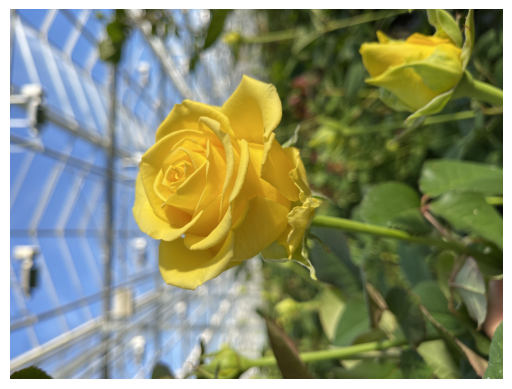

In [3]:
# Відкриття зображення
image = Image.open('IMG_0782.JPG')
print(f"Розмір файлу: {os.path.getsize('IMG_0782.JPG')} байт")
print(f"Розмір зображення: {image.size}")
plt.axis('off')
plt.imshow(image);

In [6]:
# Збереження зображення у форматі JPEG з певними параметрами стиснення

image.save('compressed_ROSES.jpg', format='JPEG', quality=20, optimize=True)

# Параметр quality визначає якість стиснення від 0 (максимально стиснене) до 100 (максимально якісне),
# і параметр optimize вказує, чи потрібно використовувати оптимізацію при стисненні.

Розмір файлу: 174432 байт
Розмір зображення: (4032, 3024)


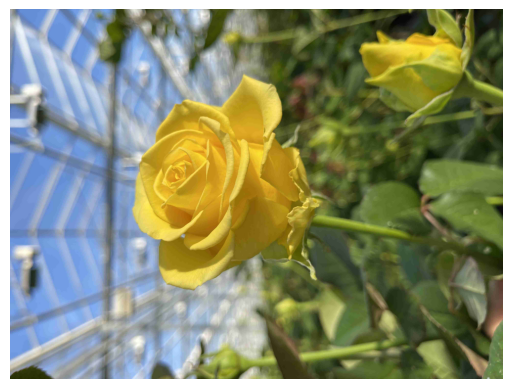

In [7]:
# Виводимо стиснене зображення
img = Image.open('compressed_ROSES.jpg')
print(f"Розмір файлу: {os.path.getsize('compressed_ROSES.jpg')} байт")
print(f"Розмір зображення: {img.size}")
plt.axis('off')
plt.imshow(img);

### 2.	 Стиснення текстового файлу з використанням бібліотеки gzip

In [8]:
import gzip

In [13]:
# Відкриваємо файл, який ми хочемо стиснути, для читання в текстовому режимі
with open('ROSES.txt', 'rt') as file_in:
    # Відкриваємо файл, у який буде записано стиснутий текст
    with gzip.open('ROSES_INFO.gz', 'wt') as file_out:
        # Стиснутий текст буде записуватися в файл 'compressed_ROSES.gz'
        file_out.writelines(file_in)

print('File compression complete.')

File compression complete.


In [15]:
print(f"Розмір початкового файлу: {os.path.getsize('ROSES.txt')} байт")
print(f"Розмір стисненого файлу: {os.path.getsize('ROSES_INFO.gz')} байт")

Розмір початкового файлу: 4197 байт
Розмір стисненого файлу: 1585 байт


### 3. Стиснення та розпакування текстового файлу за допомогою алгоритму Хаффмана

In [16]:
# Node of a Huffman Tree
class Nodes:
    def __init__(self, probability, symbol, left = None, right = None):
        # probability of the symbol
        self.probability = probability

        # the symbol
        self.symbol = symbol

        # the left node
        self.left = left

        # the right node
        self.right = right

        # the tree direction (0 or 1)
        self.code = ''

""" A supporting function in order to calculate the probabilities of symbols in specified data """
def CalculateProbability(the_data):
    the_symbols = dict()
    for item in the_data:
        if the_symbols.get(item) == None:
            the_symbols[item] = 1
        else:
            the_symbols[item] += 1
    return the_symbols

""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """
the_codes = dict()

def CalculateCodes(node, value = ''):
    # a huffman code for current node
    newValue = value + str(node.code)

    if(node.left):
        CalculateCodes(node.left, newValue)
    if(node.right):
        CalculateCodes(node.right, newValue)

    if(not node.left and not node.right):
        the_codes[node.symbol] = newValue

    return the_codes

""" A supporting function in order to get the encoded result """
def OutputEncoded(the_data, coding):
    encodingOutput = []
    for element in the_data:
        # print(coding[element], end = '')
        encodingOutput.append(coding[element])

    the_string = ''.join([str(item) for item in encodingOutput])
    return the_string

""" A supporting function in order to calculate the space difference between compressed and non compressed data"""
def TotalGain(the_data, coding):
    # total bit space to store the data before compression
    beforeCompression = len(the_data) * 8
    afterCompression = 0
    the_symbols = coding.keys()
    for symbol in the_symbols:
        the_count = the_data.count(symbol)
        # calculating how many bit is required for that symbol in total
        afterCompression += the_count * len(coding[symbol])
    print("Space usage before compression (in bits):", beforeCompression)
    print("Space usage after compression (in bits):",  afterCompression)

def HuffmanEncoding(the_data):
    symbolWithProbs = CalculateProbability(the_data)
    the_symbols = symbolWithProbs.keys()
    the_probabilities = symbolWithProbs.values()
    print("symbols: ", the_symbols)
    print("probabilities: ", the_probabilities)

    the_nodes = []

    # converting symbols and probabilities into huffman tree nodes
    for symbol in the_symbols:
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))

    while len(the_nodes) > 1:
        # sorting all the nodes in ascending order based on their probability
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)
        # for node in nodes:
        #      print(node.symbol, node.prob)

        # picking two smallest nodes
        right = the_nodes[0]
        left = the_nodes[1]

        left.code = 0
        right.code = 1

        # combining the 2 smallest nodes to create new node
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)

        the_nodes.remove(left)
        the_nodes.remove(right)
        the_nodes.append(newNode)

    huffmanEncoding = CalculateCodes(the_nodes[0])
    print("symbols with codes", huffmanEncoding)
    TotalGain(the_data, huffmanEncoding)
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)
    return encodedOutput, the_nodes[0]

def HuffmanDecoding(encodedData, huffmanTree):
    treeHead = huffmanTree
    decodedOutput = []
    for x in encodedData:
        if x == '1':
            huffmanTree = huffmanTree.right
        elif x == '0':
            huffmanTree = huffmanTree.left
        try:
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:
                pass
        except AttributeError:
            decodedOutput.append(huffmanTree.symbol)
            huffmanTree = treeHead

    string = ''.join([str(item) for item in decodedOutput])
    return string

#### Перевіримо процес кодування/декодування на простому тексті

In [17]:
the_data = "We will win!"
print(the_data)
encoding, the_tree = HuffmanEncoding(the_data)
print('Encoded output: ', encoding)
print('Decoded Output: ', HuffmanDecoding(encoding, the_tree))

We will win!
symbols:  dict_keys(['W', 'e', ' ', 'w', 'i', 'l', 'n', '!'])
probabilities:  dict_values([1, 1, 2, 2, 2, 2, 1, 1])
symbols with codes {'l': '000', 'i': '001', 'w': '010', ' ': '011', '!': '100', 'n': '101', 'e': '110', 'W': '111'}
Space usage before compression (in bits): 96
Space usage after compression (in bits): 36
Encoded output:  111110011010001000000011010001101100
Decoded Output:  We will win!


#### Застосуємо цей алгоритм до данних з текстового файлу

In [18]:
file = 'ROSES.txt'
with open(file, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()

In [19]:
# Дані з текстового файлу
text

'Троянди: догляд навесні і влітку\nТроянди не даремно називають королевами квітів. Ці прекрасні рослини радують око своїм неперевершеним зовнішнім виглядом і ароматом. А величезна різноманітність сортів, типів, кольорових відтінків просто вражає уяву. Привертають троянди і своїм тривалим періодом цвітіння - практично все літо. Але можливо це тільки при правильному догляді за кущами, їх своєчасній підгодівлі й захисту.\n\nДогляд за трояндами навесні\nПрибирання укриття, обрізка\nВесняні клопоти починаються зі зняття укриття. Потрібно уважно стежити за температурою навколишнього середовища. Коли вона буде вище -5 С знімають верхній шар укриття. Через кілька днів, коли температура стане 0 С, потрібно зняти наступний шар (гілля або укриття), а потім і прибрати сухе листя. Так адаптація рослини буде поступовою і комфортною.\n\nВажливо: від кореневої шийки, місця щеплення захист слід прибирати на останньому етапі.\n\nНаступний етап - обрізка. Навесні вона носить санітарний характер. Важливо 

In [20]:
# Проводимо кодування тексту
encoding, the_tree = HuffmanEncoding(text)

symbols:  dict_keys(['Т', 'р', 'о', 'я', 'н', 'д', 'и', ':', ' ', 'г', 'л', 'а', 'в', 'е', 'с', 'і', 'т', 'к', 'у', '\n', 'м', 'з', 'ю', 'ь', '.', 'Ц', 'п', 'ї', 'ш', 'А', 'ч', ',', 'х', 'ж', 'є', 'П', 'ц', '-', 'щ', 'й', 'Д', 'б', 'В', 'К', '5', 'С', 'Ч', '0', '(', ')', 'ф', 'Н', 'О', 'З', '1', 'Я', '/', '3', 'Ф', 'Г', '4', '2', 'Р', 'Ш'])
probabilities:  dict_values([4, 125, 190, 44, 133, 53, 129, 3, 311, 25, 56, 135, 82, 65, 60, 119, 125, 64, 60, 23, 56, 44, 22, 41, 29, 2, 54, 8, 13, 2, 19, 26, 12, 16, 4, 4, 9, 19, 12, 13, 1, 43, 5, 2, 6, 2, 2, 4, 1, 1, 2, 2, 2, 1, 4, 1, 3, 6, 1, 1, 1, 1, 1, 2])
symbols with codes {'l': '000', 'i': '001', 'w': '010', ' ': '010', '!': '100', 'n': '101', 'e': '110', 'W': '111', 'п': '000000', 'д': '000001', 'й': '00001000', 'ш': '00001001', ',': '0000101', 'г': '0000110', '/': '0000111000', ':': '0000111001', '3': '000011101', 'щ': '00001111', 'о': '0001', 'х': '00100000', '5': '001000010', 'В': '001000011', '\n': '0010001', 'з': '001001', 'я': '00101

In [21]:
# Закодовані данні
encoding

'101010001110000010010101000000001100100001110010100000010001000011011111001010000001010100001100011101111110111000111001011100100011111111111010111010011010001000110101000111000001001010100000000110010101000011110100000010110110001111111101000000101010000110001001100100111011000110001011001101010101000001110000011111101111001110110111101001010101000011111101011111000111101011010011101100111100100000001100011111010011000110110111000111001011000001110111111110011000100101011000110000001110100011000101100110101000011010000010101101100111000110101001111100101000011110000000111111000111100111011111100000010010111110001001111100100010010001001111000111000001001100011101111001000111100100001101111100101000000100011111001011100100110110000011111001101011000111110101011010011101100001000111011111111110010111000011110010011000011001011001110001001100000011111001101000111010111000111011011101100110101011011000111001011111000111000010101010111001000000111000111000010101010100000111111001101000111

In [22]:
# Зберігаємо закодовані дані в файл
filename, file_extension = os.path.splitext(file)
output_path = filename + "_compressed" + ".bin"
with open(output_path, 'w') as output:
    output.write(encoding)

In [23]:
# Зчитуємо дані із закодованого файлу та декодуємо їх
with open(output_path, 'rt') as file_in:
     text = file_in.read()
     text = text.rstrip()
     text = HuffmanDecoding(text, the_tree)
text

'Троянди: догляд навесні і влітку\nТроянди не даремно називають королевами квітів. Ці прекрасні рослини радують око своїм неперевершеним зовнішнім виглядом і ароматом. А величезна різноманітність сортів, типів, кольорових відтінків просто вражає уяву. Привертають троянди і своїм тривалим періодом цвітіння - практично все літо. Але можливо це тільки при правильному догляді за кущами, їх своєчасній підгодівлі й захисту.\n\nДогляд за трояндами навесні\nПрибирання укриття, обрізка\nВесняні клопоти починаються зі зняття укриття. Потрібно уважно стежити за температурою навколишнього середовища. Коли вона буде вище -5 С знімають верхній шар укриття. Через кілька днів, коли температура стане 0 С, потрібно зняти наступний шар (гілля або укриття), а потім і прибрати сухе листя. Так адаптація рослини буде поступовою і комфортною.\n\nВажливо: від кореневої шийки, місця щеплення захист слід прибирати на останньому етапі.\n\nНаступний етап - обрізка. Навесні вона носить санітарний характер. Важливо 